Import necessary libraries

In [1]:
'''
#Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os


Load data and set the parameters

In [2]:
batch_size = 512
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Generate the model

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Train the model

In [4]:
# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
  print('Not using data augmentation.')
  model.fit(x_train, y_train,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(x_test, y_test),
      shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
  Fit_CNN = model.fit_generator(datagen.flow(x_train, y_train,
                  batch_size=batch_size),
            epochs=epochs,
            validation_data=(x_test, y_test),
            workers=4)

Using real-time data augmentation.
Epoch 1/10


/var/folders/50/lvljp8zs01x6s7xzpqs95b2h0000gn/T/ipykernel_5233/706324705.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Fit_CNN = model.fit_generator(datagen.flow(x_train, y_train,


98/98 [==============================] - 18s 180ms/step - loss: 2.1390 - accuracy: 0.2083 - val_loss: 1.9737 - val_accuracy: 0.3054
Epoch 2/10
98/98 [==============================] - 18s 180ms/step - loss: 1.9446 - accuracy: 0.2939 - val_loss: 1.8027 - val_accuracy: 0.3755
Epoch 3/10
98/98 [==============================] - 18s 184ms/step - loss: 1.8326 - accuracy: 0.3370 - val_loss: 1.7130 - val_accuracy: 0.3996
Epoch 4/10
98/98 [==============================] - 18s 185ms/step - loss: 1.7650 - accuracy: 0.3590 - val_loss: 1.6388 - val_accuracy: 0.4131
Epoch 5/10
98/98 [==============================] - 19s 189ms/step - loss: 1.7140 - accuracy: 0.3796 - val_loss: 1.5898 - val_accuracy: 0.4343
Epoch 6/10
98/98 [==============================] - 19s 189ms/step - loss: 1.6701 - accuracy: 0.3923 - val_loss: 1.5361 - val_accuracy: 0.4531
Epoch 7/10
98/98 [==============================] - 19s 188ms/step - loss: 1.6342 - accuracy: 0.4063 - val_loss: 1.4990 - val_accuracy: 0.4608
Epoch 8/10

Save model and weights

In [6]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /Users/yipengwei/Downloads/saved_models/keras_cifar10_trained_model.h5 


/Users/yipengwei/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Score trained model.

In [36]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 6ms/step - loss: 2.0111 - accuracy: 0.2807
Test loss: 2.0111401081085205
Test accuracy: 0.2806999981403351


In [17]:
'''
Hidden Layer 0
'''
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model_hidden_layer_0 = Sequential()
model_hidden_layer_0.add(Flatten(input_shape=x_train.shape[1:]))
model_hidden_layer_0.add(Dense(num_classes))
model_hidden_layer_0.add(Activation('softmax'))

In [20]:
# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-08, decay=1e-6)

model_hidden_layer_0.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
    print('Not using data augmentation.')
    model_hidden_layer_0.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
Fit_hidden_layer_0 = model_hidden_layer_0.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Using real-time data augmentation.
Epoch 1/10


/var/folders/50/lvljp8zs01x6s7xzpqs95b2h0000gn/T/ipykernel_42644/220951600.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Fit_hidden_layer_0 = model_hidden_layer_0.fit_generator(datagen.flow(x_train, y_train,


98/98 [==============================] - 6s 55ms/step - loss: 2.1649 - accuracy: 0.2094 - val_loss: 2.0472 - val_accuracy: 0.2687
Epoch 2/10
98/98 [==============================] - 6s 55ms/step - loss: 2.0224 - accuracy: 0.2750 - val_loss: 1.9664 - val_accuracy: 0.3050
Epoch 3/10
98/98 [==============================] - 5s 53ms/step - loss: 1.9727 - accuracy: 0.3033 - val_loss: 1.9225 - val_accuracy: 0.3278
Epoch 4/10
98/98 [==============================] - 5s 54ms/step - loss: 1.9430 - accuracy: 0.3144 - val_loss: 1.8940 - val_accuracy: 0.3370
Epoch 5/10
98/98 [==============================] - 6s 55ms/step - loss: 1.9224 - accuracy: 0.3235 - val_loss: 1.8752 - val_accuracy: 0.3500
Epoch 6/10
98/98 [==============================] - 5s 54ms/step - loss: 1.9116 - accuracy: 0.3288 - val_loss: 1.8653 - val_accuracy: 0.3521
Epoch 7/10
98/98 [==============================] - 5s 54ms/step - loss: 1.9015 - accuracy: 0.3343 - val_loss: 1.8502 - val_accuracy: 0.3554
Epoch 8/10
98/98 [======

In [21]:
'''
Hidden Layer 1
'''
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model_hidden_layer_1 = Sequential()
model_hidden_layer_1.add(Flatten(input_shape=x_train.shape[1:]))
model_hidden_layer_1.add(Dense(512))
model.add(Activation('relu'))
model_hidden_layer_1.add(Dropout(0.5))
model_hidden_layer_1.add(Dense(num_classes))
model_hidden_layer_1.add(Activation('softmax'))

In [22]:
# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-08, decay=1e-6)

model_hidden_layer_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
    print('Not using data augmentation.')
    model_hidden_layer_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
Fit_hidden_layer_1 = model_hidden_layer_1.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Using real-time data augmentation.
Epoch 1/10


/var/folders/50/lvljp8zs01x6s7xzpqs95b2h0000gn/T/ipykernel_42644/453467427.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Fit_hidden_layer_1 = model_hidden_layer_1.fit_generator(datagen.flow(x_train, y_train,


98/98 [==============================] - 6s 63ms/step - loss: 2.4565 - accuracy: 0.1908 - val_loss: 2.0914 - val_accuracy: 0.2824
Epoch 2/10
98/98 [==============================] - 6s 61ms/step - loss: 2.2010 - accuracy: 0.2460 - val_loss: 1.9767 - val_accuracy: 0.3045
Epoch 3/10
98/98 [==============================] - 6s 60ms/step - loss: 2.1610 - accuracy: 0.2609 - val_loss: 1.9774 - val_accuracy: 0.3022
Epoch 4/10
98/98 [==============================] - 6s 61ms/step - loss: 2.1090 - accuracy: 0.2768 - val_loss: 1.9752 - val_accuracy: 0.3090
Epoch 5/10
98/98 [==============================] - 6s 61ms/step - loss: 2.0884 - accuracy: 0.2830 - val_loss: 2.0735 - val_accuracy: 0.3234
Epoch 6/10
98/98 [==============================] - 6s 61ms/step - loss: 2.0639 - accuracy: 0.2868 - val_loss: 2.0169 - val_accuracy: 0.2711
Epoch 7/10
98/98 [==============================] - 6s 61ms/step - loss: 2.0483 - accuracy: 0.2893 - val_loss: 1.8718 - val_accuracy: 0.3537
Epoch 8/10
98/98 [======

In [46]:
'''
Hidden Layer 2
'''
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model_hidden_layer_2 = Sequential()
model_hidden_layer_2.add(Flatten(input_shape=x_train.shape[1:]))
model_hidden_layer_2.add(Dense(512))
model_hidden_layer_2.add(Activation('relu'))
model_hidden_layer_2.add(Dropout(0.5))
model_hidden_layer_2.add(Dense(512))
model_hidden_layer_2.add(Activation('relu'))
model_hidden_layer_2.add(Dropout(0.5))
model_hidden_layer_2.add(Dense(num_classes))
model_hidden_layer_2.add(Activation('softmax'))

In [47]:
# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-08, decay=1e-6)

model_hidden_layer_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
    print('Not using data augmentation.')
    model_hidden_layer_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
Fit_hidden_layer_2 = model_hidden_layer_2.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Using real-time data augmentation.
Epoch 1/10


/var/folders/50/lvljp8zs01x6s7xzpqs95b2h0000gn/T/ipykernel_42644/3875659683.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Fit_hidden_layer_2 = model_hidden_layer_2.fit_generator(datagen.flow(x_train, y_train,


98/98 [==============================] - 7s 65ms/step - loss: 2.1518 - accuracy: 0.2080 - val_loss: 1.9600 - val_accuracy: 0.2948
Epoch 2/10
98/98 [==============================] - 7s 64ms/step - loss: 2.0098 - accuracy: 0.2659 - val_loss: 1.8678 - val_accuracy: 0.3514
Epoch 3/10
98/98 [==============================] - 6s 62ms/step - loss: 1.9446 - accuracy: 0.2974 - val_loss: 1.8115 - val_accuracy: 0.3653
Epoch 4/10
98/98 [==============================] - 7s 63ms/step - loss: 1.9078 - accuracy: 0.3139 - val_loss: 1.7493 - val_accuracy: 0.3841
Epoch 5/10
98/98 [==============================] - 7s 64ms/step - loss: 1.8768 - accuracy: 0.3249 - val_loss: 1.7200 - val_accuracy: 0.3993
Epoch 6/10
98/98 [==============================] - 7s 63ms/step - loss: 1.8585 - accuracy: 0.3335 - val_loss: 1.7303 - val_accuracy: 0.3962
Epoch 7/10
98/98 [==============================] - 7s 66ms/step - loss: 1.8319 - accuracy: 0.3419 - val_loss: 1.6762 - val_accuracy: 0.4126
Epoch 8/10
98/98 [======

In [26]:
'''
Hidden Layer 3
'''
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model_hidden_layer_3 = Sequential()
model_hidden_layer_3.add(Flatten(input_shape=x_train.shape[1:]))
model_hidden_layer_3.add(Dense(512))
model_hidden_layer_3.add(Activation('relu'))
model_hidden_layer_3.add(Dropout(0.5))
model_hidden_layer_3.add(Dense(512))
model_hidden_layer_3.add(Activation('relu'))
model_hidden_layer_3.add(Dropout(0.5))
model_hidden_layer_3.add(Dense(512))
model_hidden_layer_3.add(Activation('relu'))
model_hidden_layer_3.add(Dropout(0.5))
model_hidden_layer_3.add(Dense(num_classes))
model_hidden_layer_3.add(Activation('softmax'))

In [27]:
# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-08, decay=1e-6)

model_hidden_layer_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
    print('Not using data augmentation.')
    model_hidden_layer_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
Fit_hidden_layer_3 = model_hidden_layer_3.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Using real-time data augmentation.
Epoch 1/10


/var/folders/50/lvljp8zs01x6s7xzpqs95b2h0000gn/T/ipykernel_42644/230360576.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Fit_hidden_layer_3 = model_hidden_layer_3.fit_generator(datagen.flow(x_train, y_train,


98/98 [==============================] - 7s 67ms/step - loss: 2.6599 - accuracy: 0.1779 - val_loss: 2.1377 - val_accuracy: 0.2508
Epoch 2/10
98/98 [==============================] - 7s 65ms/step - loss: 2.2958 - accuracy: 0.2222 - val_loss: 1.8870 - val_accuracy: 0.3342
Epoch 3/10
98/98 [==============================] - 7s 67ms/step - loss: 2.2178 - accuracy: 0.2361 - val_loss: 1.8699 - val_accuracy: 0.3552
Epoch 4/10
98/98 [==============================] - 7s 68ms/step - loss: 2.1702 - accuracy: 0.2441 - val_loss: 1.8542 - val_accuracy: 0.3554
Epoch 5/10
98/98 [==============================] - 7s 68ms/step - loss: 2.1402 - accuracy: 0.2507 - val_loss: 1.8544 - val_accuracy: 0.3578
Epoch 6/10
98/98 [==============================] - 7s 68ms/step - loss: 2.1187 - accuracy: 0.2579 - val_loss: 1.9114 - val_accuracy: 0.3231
Epoch 7/10
98/98 [==============================] - 7s 66ms/step - loss: 2.1001 - accuracy: 0.2609 - val_loss: 1.8349 - val_accuracy: 0.3495
Epoch 8/10
98/98 [======

In [29]:
'''
Hidden Layer 4
'''
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model_hidden_layer_4 = Sequential()
model_hidden_layer_4.add(Flatten(input_shape=x_train.shape[1:]))
model_hidden_layer_4.add(Dense(512))
model_hidden_layer_4.add(Activation('relu'))
model_hidden_layer_4.add(Dropout(0.5))
model_hidden_layer_4.add(Dense(512))
model_hidden_layer_4.add(Activation('relu'))
model_hidden_layer_4.add(Dropout(0.5))
model_hidden_layer_4.add(Dense(512))
model_hidden_layer_4.add(Activation('relu'))
model_hidden_layer_4.add(Dropout(0.5))
model_hidden_layer_4.add(Dense(512))
model_hidden_layer_4.add(Activation('relu'))
model_hidden_layer_4.add(Dropout(0.5))
model_hidden_layer_4.add(Dense(num_classes))
model_hidden_layer_4.add(Activation('softmax'))

In [30]:
# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-08, decay=1e-6)

model_hidden_layer_4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
    print('Not using data augmentation.')
    model_hidden_layer_4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
Fit_hidden_layer_4 = model_hidden_layer_4.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Using real-time data augmentation.
Epoch 1/10


/var/folders/50/lvljp8zs01x6s7xzpqs95b2h0000gn/T/ipykernel_42644/1945396218.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Fit_hidden_layer_4 = model_hidden_layer_4.fit_generator(datagen.flow(x_train, y_train,


98/98 [==============================] - 7s 69ms/step - loss: 2.9362 - accuracy: 0.1578 - val_loss: 1.9408 - val_accuracy: 0.3099
Epoch 2/10
98/98 [==============================] - 7s 69ms/step - loss: 2.5037 - accuracy: 0.1916 - val_loss: 1.8835 - val_accuracy: 0.3415
Epoch 3/10
98/98 [==============================] - 7s 70ms/step - loss: 2.3936 - accuracy: 0.2074 - val_loss: 1.8598 - val_accuracy: 0.3521
Epoch 4/10
98/98 [==============================] - 7s 67ms/step - loss: 2.3092 - accuracy: 0.2188 - val_loss: 1.9585 - val_accuracy: 0.3066
Epoch 5/10
98/98 [==============================] - 7s 68ms/step - loss: 2.2715 - accuracy: 0.2221 - val_loss: 1.8510 - val_accuracy: 0.3565
Epoch 6/10
98/98 [==============================] - 7s 67ms/step - loss: 2.2346 - accuracy: 0.2287 - val_loss: 1.8398 - val_accuracy: 0.3647
Epoch 7/10
98/98 [==============================] - 7s 69ms/step - loss: 2.2051 - accuracy: 0.2330 - val_loss: 1.8548 - val_accuracy: 0.3412
Epoch 8/10
98/98 [======

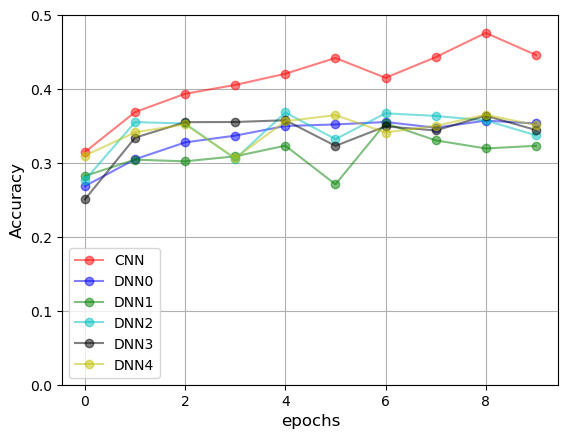

In [45]:
import matplotlib.pyplot as plt

plt.grid() 
plt.plot(range(epochs),Fit_CNN.history['val_accuracy'],'-or',alpha=0.5,label='CNN') 
plt.plot(range(epochs),Fit_hidden_layer_0.history['val_accuracy'],'-ob',alpha=0.5,label='DNN0') 
plt.plot(range(epochs),Fit_hidden_layer_1.history['val_accuracy'],'-og',alpha=0.5,label='DNN1') 
plt.plot(range(epochs),Fit_hidden_layer_2.history['val_accuracy'],'-oc',alpha=0.5,label='DNN2') 
plt.plot(range(epochs),Fit_hidden_layer_3.history['val_accuracy'],'-ok',alpha=0.5,label='DNN3') 
plt.plot(range(epochs),Fit_hidden_layer_4.history['val_accuracy'],'-oy',alpha=0.5,label='DNN4')
plt.ylim(0, 0.5)

plt.xlabel('epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
_=plt.legend(loc='best')


In [48]:
'''
Sigmoid activation function
'''
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model_sigmoid = Sequential()
model_sigmoid.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(Conv2D(32, (3, 3)))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(MaxPooling2D(pool_size=(2, 2)))
model_sigmoid.add(Dropout(0.25))

model_sigmoid.add(Conv2D(64, (3, 3), padding='same'))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(Conv2D(64, (3, 3)))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(MaxPooling2D(pool_size=(2, 2)))
model_sigmoid.add(Dropout(0.25))

model_sigmoid.add(Flatten())
model_sigmoid.add(Dense(512))
model_sigmoid.add(Activation('sigmoid'))
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(num_classes))
model_sigmoid.add(Activation('softmax'))

In [49]:
# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-08, decay=1e-6)

model_sigmoid.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
    print('Not using data augmentation.')
    model_sigmoid.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
Fit_CNN_sigmoid = model_sigmoid.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Using real-time data augmentation.
Epoch 1/10


/var/folders/50/lvljp8zs01x6s7xzpqs95b2h0000gn/T/ipykernel_42644/3629456013.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Fit_CNN_sigmoid = model_sigmoid.fit_generator(datagen.flow(x_train, y_train,


98/98 [==============================] - 19s 190ms/step - loss: 2.3827 - accuracy: 0.0979 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 2/10
98/98 [==============================] - 19s 189ms/step - loss: 2.3077 - accuracy: 0.0984 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 3/10
98/98 [==============================] - 19s 188ms/step - loss: 2.3045 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
98/98 [==============================] - 19s 189ms/step - loss: 2.3036 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 5/10
98/98 [==============================] - 19s 188ms/step - loss: 2.3035 - accuracy: 0.0987 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 6/10
98/98 [==============================] - 19s 187ms/step - loss: 2.3034 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
98/98 [==============================] - 19s 188ms/step - loss: 2.3035 - accuracy: 0.0975 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 8/10

In [50]:
'''
With drop out and augmentation
'''
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

epochs = 100
data_augmentation = True

modeld1a1 = Sequential()
modeld1a1.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
modeld1a1.add(Activation('relu'))
modeld1a1.add(Conv2D(32, (3, 3)))
modeld1a1.add(Activation('relu'))
modeld1a1.add(MaxPooling2D(pool_size=(2, 2)))
modeld1a1.add(Dropout(0.25))

modeld1a1.add(Conv2D(64, (3, 3), padding='same'))
modeld1a1.add(Activation('relu'))
modeld1a1.add(Conv2D(64, (3, 3)))
modeld1a1.add(Activation('relu'))
modeld1a1.add(MaxPooling2D(pool_size=(2, 2)))
modeld1a1.add(Dropout(0.25))

modeld1a1.add(Flatten())
modeld1a1.add(Dense(512))
modeld1a1.add(Activation('relu'))
modeld1a1.add(Dropout(0.5))
modeld1a1.add(Dense(num_classes))
modeld1a1.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-08, decay=1e-6)

modeld1a1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
    print('Not using data augmentation.')
    modeld1a1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
Fit_CNN_d1a1 = modeld1a1.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Using real-time data augmentation.
Epoch 1/100


/var/folders/50/lvljp8zs01x6s7xzpqs95b2h0000gn/T/ipykernel_42644/2262413454.py:88: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Fit_CNN_d1a1 = modeld1a1.fit_generator(datagen.flow(x_train, y_train,


98/98 [==============================] - 18s 182ms/step - loss: 2.1111 - accuracy: 0.2155 - val_loss: 1.9406 - val_accuracy: 0.3154
Epoch 2/100
98/98 [==============================] - 18s 183ms/step - loss: 1.9232 - accuracy: 0.3024 - val_loss: 1.7888 - val_accuracy: 0.3824
Epoch 3/100
98/98 [==============================] - 18s 186ms/step - loss: 1.8170 - accuracy: 0.3435 - val_loss: 1.7141 - val_accuracy: 0.3889
Epoch 4/100
98/98 [==============================] - 19s 187ms/step - loss: 1.7503 - accuracy: 0.3686 - val_loss: 1.6256 - val_accuracy: 0.4217
Epoch 5/100
98/98 [==============================] - 18s 186ms/step - loss: 1.7024 - accuracy: 0.3836 - val_loss: 1.5739 - val_accuracy: 0.4362
Epoch 6/100
98/98 [==============================] - 19s 190ms/step - loss: 1.6602 - accuracy: 0.3989 - val_loss: 1.5190 - val_accuracy: 0.4540
Epoch 7/100
98/98 [==============================] - 19s 190ms/step - loss: 1.6235 - accuracy: 0.4111 - val_loss: 1.5138 - val_accuracy: 0.4553
Epoc

KeyboardInterrupt: 

In [54]:
'''
Without drop out and with augmentation
'''
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

epochs = 100
data_augmentation = True

modeld0a1 = Sequential()
modeld0a1.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
modeld0a1.add(Activation('relu'))
modeld0a1.add(Conv2D(32, (3, 3)))
modeld0a1.add(Activation('relu'))
modeld0a1.add(MaxPooling2D(pool_size=(2, 2)))

modeld0a1.add(Conv2D(64, (3, 3), padding='same'))
modeld0a1.add(Activation('relu'))
modeld0a1.add(Conv2D(64, (3, 3)))
modeld0a1.add(Activation('relu'))
modeld0a1.add(MaxPooling2D(pool_size=(2, 2)))

modeld0a1.add(Flatten())
modeld0a1.add(Dense(512))
modeld0a1.add(Activation('relu'))
modeld0a1.add(Dense(num_classes))
modeld0a1.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-08, decay=1e-6)

modeld0a1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
    print('Not using data augmentation.')
    modeld0a1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
Fit_CNN_d0a1 = modeld0a1.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Using real-time data augmentation.
Epoch 1/100


/var/folders/50/lvljp8zs01x6s7xzpqs95b2h0000gn/T/ipykernel_42644/1395830271.py:85: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Fit_CNN_d0a1 = modeld0a1.fit_generator(datagen.flow(x_train, y_train,


13/98 [==>...........................] - ETA: 13s - loss: 2.2568 - accuracy: 0.1605

KeyboardInterrupt: 

In [55]:
'''
With drop out and without augmentation
'''
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

epochs = 100
data_augmentation = False

modeld1a0 = Sequential()
modeld1a0.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
modeld1a0.add(Activation('relu'))
modeld1a0.add(Conv2D(32, (3, 3)))
modeld1a0.add(Activation('relu'))
modeld1a0.add(MaxPooling2D(pool_size=(2, 2)))
modeld1a0.add(Dropout(0.25))

modeld1a0.add(Conv2D(64, (3, 3), padding='same'))
modeld1a0.add(Activation('relu'))
modeld1a0.add(Conv2D(64, (3, 3)))
modeld1a0.add(Activation('relu'))
modeld1a0.add(MaxPooling2D(pool_size=(2, 2)))
modeld1a0.add(Dropout(0.25))

modeld1a0.add(Flatten())
modeld1a0.add(Dense(512))
modeld1a0.add(Activation('relu'))
modeld1a0.add(Dropout(0.5))
modeld1a0.add(Dense(num_classes))
modeld1a0.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-08, decay=1e-6)

modeld1a0.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
    print('Not using data augmentation.')
    modeld1a0.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
Fit_CNN_d1a0 = modeld1a0.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Not using data augmentation.
Epoch 1/100
64/98 [==================>...........] - ETA: 5s - loss: 2.2234 - accuracy: 0.1656

KeyboardInterrupt: 

In [56]:
'''
Without drop out and without augmentation
'''
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

epochs = 100
data_augmentation = False

modeld0a0 = Sequential()
modeld0a0.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
modeld0a0.add(Activation('relu'))
modeld0a0.add(Conv2D(32, (3, 3)))
modeld0a0.add(Activation('relu'))
modeld0a0.add(MaxPooling2D(pool_size=(2, 2)))

modeld0a0.add(Conv2D(64, (3, 3), padding='same'))
modeld0a0.add(Activation('relu'))
modeld0a0.add(Conv2D(64, (3, 3)))
modeld0a0.add(Activation('relu'))
modeld0a0.add(MaxPooling2D(pool_size=(2, 2)))

modeld0a0.add(Flatten())
modeld0a0.add(Dense(512))
modeld0a0.add(Activation('relu'))
modeld0a0.add(Dense(num_classes))
modeld0a0.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-08, decay=1e-6)

modeld0a0.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
    print('Not using data augmentation.')
    modeld0a0.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
Fit_CNN_d0a0 = modeld0a0.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Not using data augmentation.
Epoch 1/100
98/98 [==============================] - 16s 159ms/step - loss: 1.9917 - accuracy: 0.2967 - val_loss: 1.8088 - val_accuracy: 0.3654
Epoch 2/100
 4/98 [>.............................] - ETA: 14s - loss: 1.7657 - accuracy: 0.3745

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

plt.grid() 
plt.plot(range(epochs),Fit_CNN_d1a1.history['accuracy'],'-or',alpha=0.5,label='with drop & augmentation') 
plt.plot(range(epochs),Fit_CNN_d0a1.history['accuracy'],'-ob',alpha=0.5,label='w/o drop with augmentation') 
plt.plot(range(epochs),Fit_CNN_d1a0.history['accuracy'],'-og',alpha=0.5,label='with drop w/o augmentation') 
plt.plot(range(epochs),Fit_CNN_d0a0.history['accuracy'],'-oc',alpha=0.5,label='w/o drop & augmentation') 
plt.ylim(0, 1)

plt.xlabel('epochs',fontsize=12)
plt.ylabel('Training Accuracy',fontsize=12)
_=plt.legend(loc='best')


plt.grid() 
plt.plot(range(epochs),Fit_CNN_d1a1.history['val_accuracy'],'-or',alpha=0.5,label='with drop & augmentation') 
plt.plot(range(epochs),Fit_CNN_d0a1.history['val_accuracy'],'-ob',alpha=0.5,label='w/o drop with augmentation') 
plt.plot(range(epochs),Fit_CNN_d1a0.history['val_accuracy'],'-og',alpha=0.5,label='with drop w/o augmentation') 
plt.plot(range(epochs),Fit_CNN_d0a0.history['val_accuracy'],'-oc',alpha=0.5,label='w/o drop & augmentation') 
plt.ylim(0, 1)

plt.xlabel('epochs',fontsize=12)
plt.ylabel('Test Accuracy',fontsize=12)
_=plt.legend(loc='best')